In [21]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import time
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [22]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [23]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Defining our model

In [24]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), name='conv2d_1'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_2'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_3'),
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

In [25]:
# compile the model
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# Train the model and display the activations after each epoch
start_time = time.time()
model.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels))
end_time = time.time()

1563/1563 [==============================] - 28s 18ms/step - loss: 1.3969 - accuracy: 0.5047 - val_loss: 1.2229 - val_accuracy: 0.5659


In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Time elapsed: ', end_time - start_time)

313/313 [==============================] - 2s 6ms/step - loss: 1.2229 - accuracy: 0.5659
Test accuracy: 0.5659000277519226
Time elapsed:  28.944763898849487


# conv_2d_1

Retrieving Filters

In [112]:
import numpy as np
# Define the layer you want to analyze (replace 'block4_conv1' with the desired layer name)
layer_name = 'conv2d_1'
selected_layer = model.get_layer(layer_name)

# Get the filter weights (filter matrices) of the selected layer
filter_weights = selected_layer.get_weights()[0]
min_weight = np.min(filter_weights)
max_weight = np.max(filter_weights)
normal_weight = (filter_weights-min_weight)/(max_weight-min_weight)
filter_weights = normal_weight
print(filter_weights.shape)


(3, 3, 3, 32)


Generating 32 of 3x3 filters in a matrix form.

In [134]:
# Initialize a list to store the individual 3x3 matrices
matrices = []

# Loop through each filter in the last dimension
for i in range(32):
    # Extract the 3x3 matrix for the i-th filter
    matrix = filter_weights[:, :, :, i]
    matrices.append(matrix)

# 'matrices' now contains 32 individual 3x3 matrices

print(matrices)

[array([[[0.26852533, 0.7081922 , 0.06285682],
        [0.12333623, 0.        , 0.2450354 ],
        [0.27944735, 0.26617953, 0.46328124]],

       [[0.11279331, 0.70126384, 0.22790998],
        [0.46517664, 0.25398466, 0.50285965],
        [0.26786223, 0.64704424, 0.3250531 ]],

       [[0.816437  , 0.9628212 , 0.71754307],
        [0.43137833, 0.43286344, 0.17133385],
        [0.43881533, 0.11383414, 0.6224779 ]]], dtype=float32), array([[[0.16112708, 0.46182504, 0.7010873 ],
        [0.7039066 , 0.41980532, 0.29571843],
        [0.7373017 , 0.539495  , 0.11620127]],

       [[0.09378775, 0.60405385, 0.43657935],
        [0.73457456, 0.7654703 , 0.5093067 ],
        [0.5461167 , 0.8599682 , 0.5578386 ]],

       [[0.31098494, 0.1585543 , 0.12596375],
        [0.33198252, 0.73502374, 0.61164665],
        [0.7914059 , 0.758026  , 0.58443403]]], dtype=float32), array([[[0.28494945, 0.64718354, 0.59562916],
        [0.76466775, 0.15324607, 0.1813727 ],
        [0.562284  , 0.7260798 , 0.

Visualizing Filter Matrices in conv2d_1

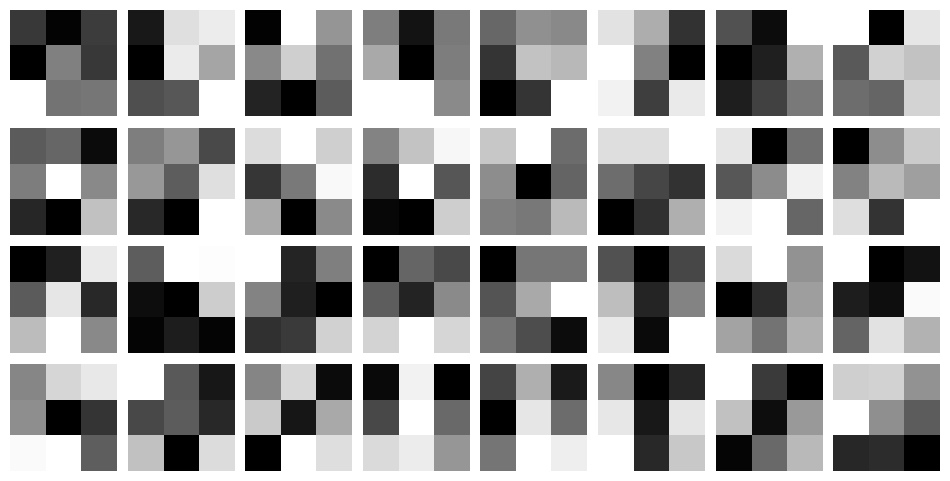

In [116]:
# Define the number of rows and columns for subplots
num_filters = filter_weights.shape[3]  # Assuming 32 filters
num_rows = 4  # You can adjust this as needed
num_cols = 8  # You can adjust this as needed

# Create subplots to visualize each filter
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i in range(num_rows):
    for j in range(num_cols):
        if i * num_cols + j < num_filters:
            # Extract a single filter's weights
            filter_data = filter_weights[:, :, :, i * num_cols + j]
            
            # Plot the filter as an image
            ax = axes[i, j]
            ax.imshow(filter_data[:, :, 0], cmap='gray')  # Assuming single-channel filters
            ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

Visualizing Feature maps or Activation maps generated in a CNN by conv2d_1

1/1 [==============================] - 0s 24ms/step


/var/folders/b8/466710_d78q31z8wgrvw2cc00000gn/T/ipykernel_11499/4010317027.py:22: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


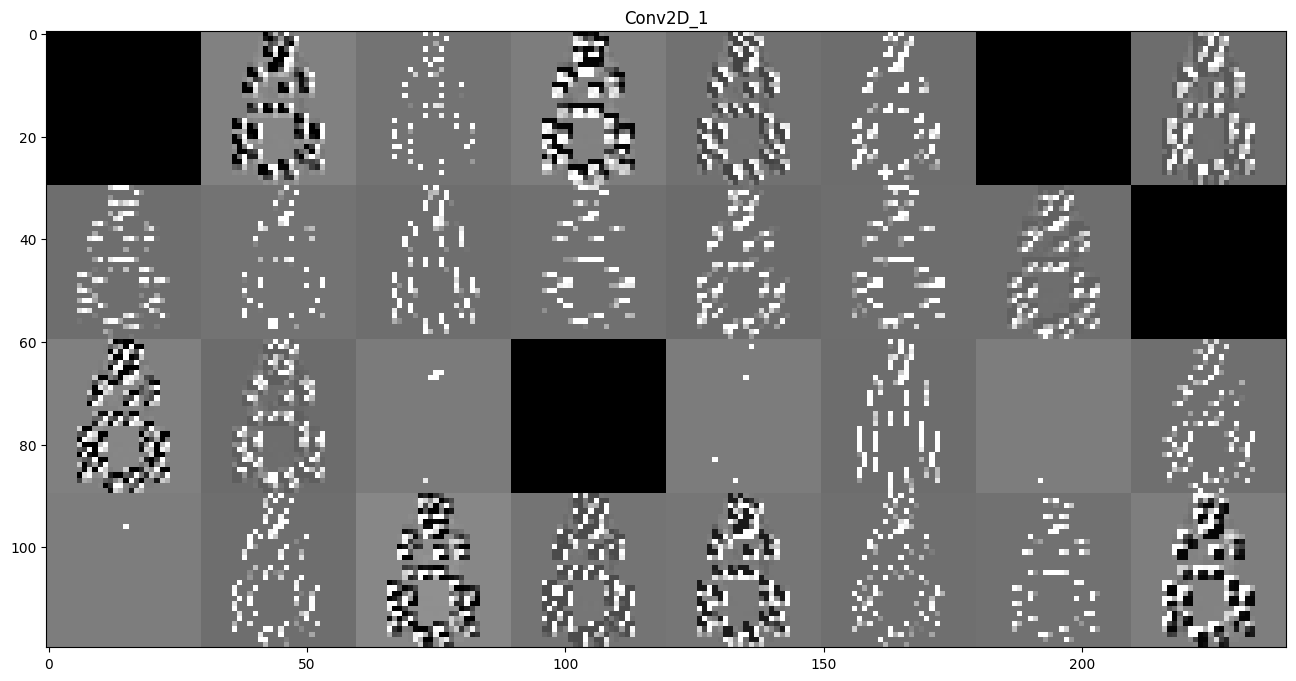

In [76]:
#Load the input image
img_path='frog.png'
img = load_img(img_path, target_size=(32, 32))
x   = img_to_array(img)                           
x = np.expand_dims(x, axis=0)
x /= 255.0

image_output = model.layers[0].output
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = image_output)

firstLayer_featureMap = visualization_model.predict(x)
totalFeatures = firstLayer_featureMap.shape[-1]  # number of features in the feature map
size  = firstLayer_featureMap.shape[1]  # feature map shape (1, size, size, n_features)
  
# We will tile our images in this matrix
display_grid = np.zeros((size*4, size * 8))
  
# Postprocess the feature to be visually palatable
for i in range(totalFeatures):
  x  = firstLayer_featureMap[0, :, :, i]
  x -= x.mean()
  x /= x.std ()
  x *=  64
  x += 128
  x  = np.clip(x, 0, 255).astype('uint8')
  # Tile each filter into a horizontal grid
  row = i // 8
  col = i % 8
  display_grid[row * size: (row + 1) * size, col * size: (col + 1) * size] = x
  
# Display the grid
scale = 2.0
plt.figure( figsize=(scale * 8, scale*4) )
plt.title ( 'Conv2D_1')
plt.grid  ( False )
plt.imshow( display_grid, aspect='auto', cmap='gray' )

# conv_2d_2

Retrieving Filters

In [101]:
# Define the layer you want to analyze (replace 'block4_conv1' with the desired layer name)
layer_name = 'conv2d_2'
selected_layer = model.get_layer(layer_name)

filter_weights = selected_layer.get_weights()[0]
min_weight = np.min(filter_weights)
max_weight = np.max(filter_weights)
normal_weight = (filter_weights-min_weight)/(max_weight-min_weight)
filter_weights = normal_weight
print(filter_weights.shape)

(3, 3, 32, 32)


Representing the filters in matrix form

In [135]:
# Initialize a list to store the individual 3x3 matrices
matrices = []

# Loop through each filter in the last dimension
for i in range(32):
    # Extract the 3x3 matrix for the i-th filter
    matrix = filter_weights[:, :, :, i]
    matrices.append(matrix)

# 'matrices' now contains 32 individual 3x3 matrices

print(matrices)

[array([[[0.26852533, 0.7081922 , 0.06285682],
        [0.12333623, 0.        , 0.2450354 ],
        [0.27944735, 0.26617953, 0.46328124]],

       [[0.11279331, 0.70126384, 0.22790998],
        [0.46517664, 0.25398466, 0.50285965],
        [0.26786223, 0.64704424, 0.3250531 ]],

       [[0.816437  , 0.9628212 , 0.71754307],
        [0.43137833, 0.43286344, 0.17133385],
        [0.43881533, 0.11383414, 0.6224779 ]]], dtype=float32), array([[[0.16112708, 0.46182504, 0.7010873 ],
        [0.7039066 , 0.41980532, 0.29571843],
        [0.7373017 , 0.539495  , 0.11620127]],

       [[0.09378775, 0.60405385, 0.43657935],
        [0.73457456, 0.7654703 , 0.5093067 ],
        [0.5461167 , 0.8599682 , 0.5578386 ]],

       [[0.31098494, 0.1585543 , 0.12596375],
        [0.33198252, 0.73502374, 0.61164665],
        [0.7914059 , 0.758026  , 0.58443403]]], dtype=float32), array([[[0.28494945, 0.64718354, 0.59562916],
        [0.76466775, 0.15324607, 0.1813727 ],
        [0.562284  , 0.7260798 , 0.

Plotting filters for conv2d_2

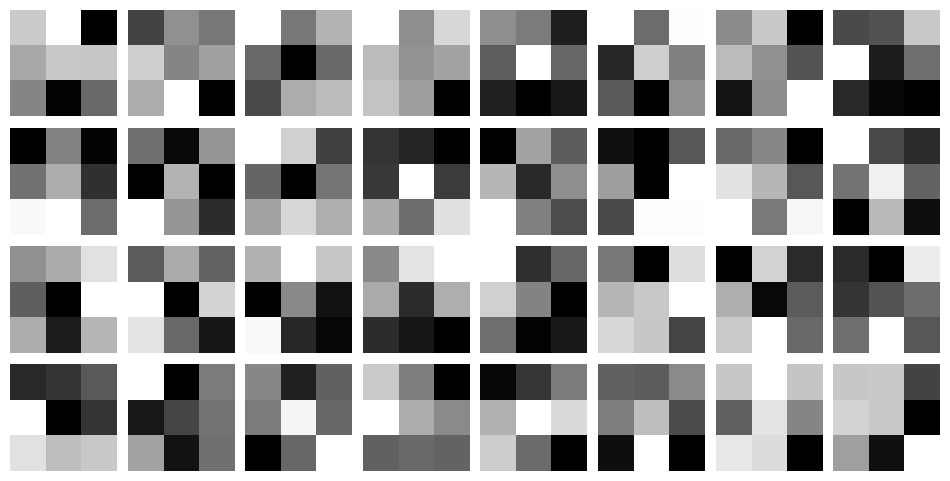

In [102]:
# Define the number of rows and columns for subplots
num_filters = filter_weights.shape[3]  # Assuming 32 filters
num_rows = 4  # You can adjust this as needed
num_cols = 8  # You can adjust this as needed

# Create subplots to visualize each filter
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i in range(num_rows):
    for j in range(num_cols):
        if i * num_cols + j < num_filters:
            # Extract a single filter's weights
            filter_data = filter_weights[:, :, :, i * num_cols + j]
            
            # Plot the filter as an image
            ax = axes[i, j]
            ax.imshow(filter_data[:, :, 0], cmap='gray')  # Assuming single-channel filters
            ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

Visualizing Feature maps or Activation maps generated in a CNN by conv2d_2

1/1 [==============================] - 0s 26ms/step


/var/folders/b8/466710_d78q31z8wgrvw2cc00000gn/T/ipykernel_11499/2224064389.py:26: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


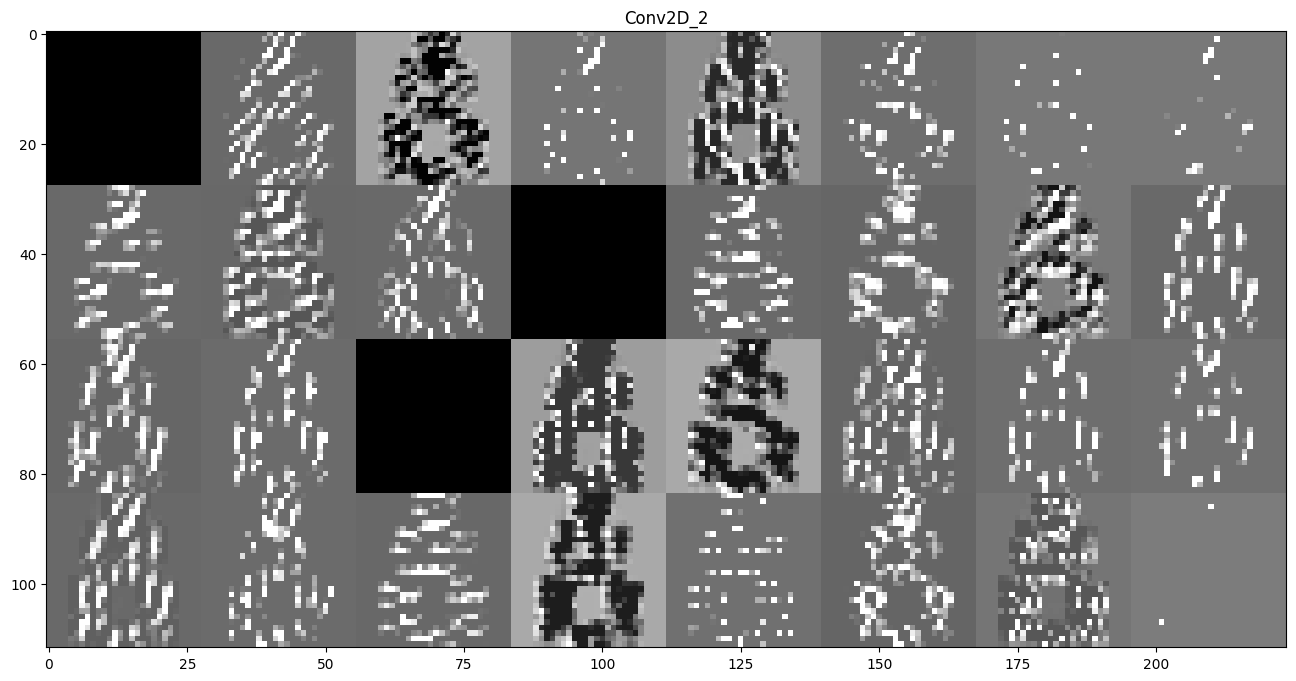

In [103]:
#Load the input image
img_path='frog.png'
img = load_img(img_path, target_size=(32, 32))
x   = img_to_array(img)                           
x = np.expand_dims(x, axis=0)
x /= 255.0

# Get the activations of 'conv2d_1' from the original model
visualization_model_conv1 = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
activations_conv1 = visualization_model_conv1.predict(x)

# Get the activations of 'conv2d_2' using activations from 'conv2d_1'
visualization_model_conv2 = tf.keras.models.Model(inputs=model.get_layer('conv2d_1').output, outputs=model.get_layer('conv2d_2').output)
activations_conv2 = visualization_model_conv2.predict(activations_conv1)
#secondLayer_featureMap = visualization_model.predict(x)
totalFeatures = activations_conv2.shape[-1]  # number of features in the feature map
size  = activations_conv2.shape[1]  # feature map shape (1, size, size, n_features)

# We will tile our images in this matrix
display_grid = np.zeros((size*4, size * 8))
  
# Postprocess the feature to be visually palatable
for i in range(totalFeatures):
  x  = activations_conv2[0, :, :, i]
  x -= x.mean()
  x /= x.std ()
  x *=  64
  x += 128
  x  = np.clip(x, 0, 255).astype('uint8')
  # Tile each filter into a horizontal grid
  row = i // 8
  col = i % 8
  display_grid[row * size: (row + 1) * size, col * size: (col + 1) * size] = x
  
# Display the grid
scale = 2.0
plt.figure( figsize=(scale * 8, scale*4) )
plt.title ( 'Conv2D_2')
plt.grid  ( False )
plt.imshow( display_grid, aspect='auto', cmap='gray' )

# conv_2d_3

Retrieving Filters

In [107]:
# Define the layer you want to analyze (replace 'block4_conv1' with the desired layer name)
layer_name = 'conv2d_3'
selected_layer = model.get_layer(layer_name)

filter_weights = selected_layer.get_weights()[0]
min_weight = np.min(filter_weights)
max_weight = np.max(filter_weights)
normal_weight = (filter_weights-min_weight)/(max_weight-min_weight)
filter_weights = normal_weight

print(filter_weights.shape)

(3, 3, 32, 32)


Representing the filters in matrix form

In [136]:
# Initialize a list to store the individual 3x3 matrices
matrices = []

# Loop through each filter in the last dimension
for i in range(32):
    # Extract the 3x3 matrix for the i-th filter
    matrix = filter_weights[:, :, :, i]
    matrices.append(matrix)

# 'matrices' now contains 32 individual 3x3 matrices

print(matrices)

[array([[[0.26852533, 0.7081922 , 0.06285682],
        [0.12333623, 0.        , 0.2450354 ],
        [0.27944735, 0.26617953, 0.46328124]],

       [[0.11279331, 0.70126384, 0.22790998],
        [0.46517664, 0.25398466, 0.50285965],
        [0.26786223, 0.64704424, 0.3250531 ]],

       [[0.816437  , 0.9628212 , 0.71754307],
        [0.43137833, 0.43286344, 0.17133385],
        [0.43881533, 0.11383414, 0.6224779 ]]], dtype=float32), array([[[0.16112708, 0.46182504, 0.7010873 ],
        [0.7039066 , 0.41980532, 0.29571843],
        [0.7373017 , 0.539495  , 0.11620127]],

       [[0.09378775, 0.60405385, 0.43657935],
        [0.73457456, 0.7654703 , 0.5093067 ],
        [0.5461167 , 0.8599682 , 0.5578386 ]],

       [[0.31098494, 0.1585543 , 0.12596375],
        [0.33198252, 0.73502374, 0.61164665],
        [0.7914059 , 0.758026  , 0.58443403]]], dtype=float32), array([[[0.28494945, 0.64718354, 0.59562916],
        [0.76466775, 0.15324607, 0.1813727 ],
        [0.562284  , 0.7260798 , 0.

Plotting the Filter Matrices

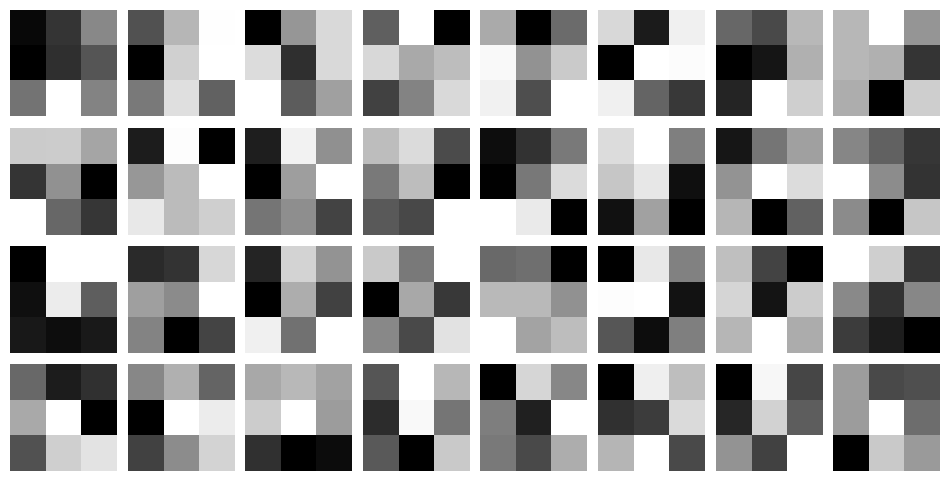

In [108]:
# Define the number of rows and columns for subplots
num_filters = filter_weights.shape[3]  # Assuming 32 filters
num_rows = 4  # You can adjust this as needed
num_cols = 8  # You can adjust this as needed

# Create subplots to visualize each filter
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i in range(num_rows):
    for j in range(num_cols):
        if i * num_cols + j < num_filters:
            # Extract a single filter's weights
            filter_data = filter_weights[:, :, :, i * num_cols + j]
            
            # Plot the filter as an image
            ax = axes[i, j]
            ax.imshow(filter_data[:, :, 0], cmap='gray')  # Assuming single-channel filters
            ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

Visualizing Feature maps or Activation maps generated in a CNN by conv2d_3

1/1 [==============================] - 0s 25ms/step


/var/folders/b8/466710_d78q31z8wgrvw2cc00000gn/T/ipykernel_11499/2160639087.py:30: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


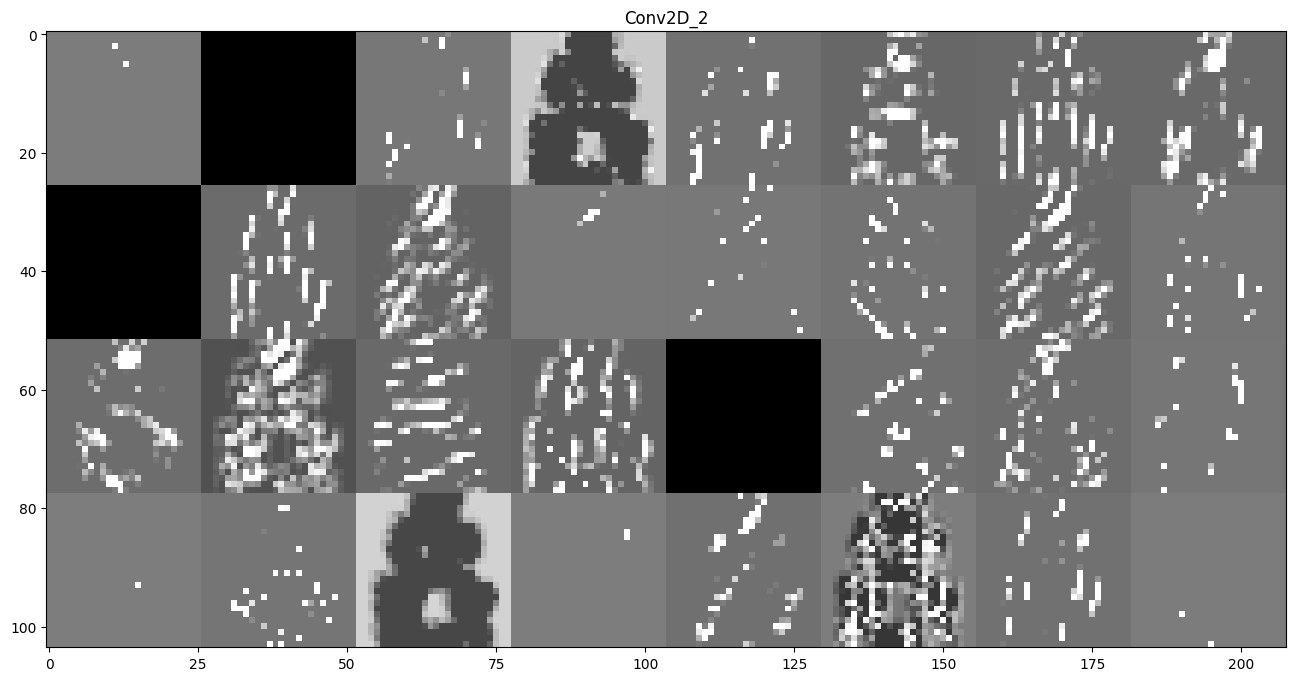

In [109]:
#Load the input image
img_path='frog.png'
img = load_img(img_path, target_size=(32, 32))
x   = img_to_array(img)                           
x = np.expand_dims(x, axis=0)
x /= 255.0

# Get the activations of 'conv2d_1' from the original model
visualization_model_conv1 = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
activations_conv1 = visualization_model_conv1.predict(x)

# Get the activations of 'conv2d_2' using activations from 'conv2d_1'
visualization_model_conv2 = tf.keras.models.Model(inputs=model.get_layer('conv2d_1').output, outputs=model.get_layer('conv2d_2').output)
activations_conv2 = visualization_model_conv2.predict(activations_conv1)

# Get the activations of 'conv2d_3' using activations from 'conv2d_1'
visualization_model_conv3 = tf.keras.models.Model(inputs=model.get_layer('conv2d_2').output, outputs=model.get_layer('conv2d_3').output)
activations_conv3 = visualization_model_conv3.predict(activations_conv2)

totalFeatures = activations_conv3.shape[-1]  # number of features in the feature map
size  = activations_conv3.shape[1]  # feature map shape (1, size, size, n_features)

# We will tile our images in this matrix
display_grid = np.zeros((size*4, size * 8))
  
# Postprocess the feature to be visually palatable
for i in range(totalFeatures):
  x  = activations_conv3[0, :, :, i]
  x -= x.mean()
  x /= x.std ()
  x *=  64
  x += 128
  x  = np.clip(x, 0, 255).astype('uint8')
  # Tile each filter into a horizontal grid
  row = i // 8
  col = i % 8
  display_grid[row * size: (row + 1) * size, col * size: (col + 1) * size] = x
  
# Display the grid
scale = 2.0
plt.figure( figsize=(scale * 8, scale*4) )
plt.title ( 'Conv2D_2')
plt.grid  ( False )
plt.imshow( display_grid, aspect='auto', cmap='gray' )